EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Cristian Díaz`
  - `# Fernando parra`
- Usuario de GitHub (opcional):  `# cristiandiazh`



## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

consolidado= pd.concat([X,y], axis=1)
consolidado.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
consolidado.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [13]:
# Cuenta de valores faltantes por columna
missing_counts = consolidado.isnull().sum()

print(missing_counts)
missing_pct = consolidado.isnull().mean() * 100
print(missing_pct)

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64
age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
balance        0.0
housing        0.0
loan           0.0
contact        0.0
day_of_week    0.0
month          0.0
duration       0.0
campaign       0.0
pdays          0.0
previous       0.0
poutcome       0.0
y              0.0
dtype: float64


Vamos a evaluar los missings utilizando varios métodos de rellenado. Gracias a la idea de ChatGPT, presentamos 4 formas de reemplazar los missings y evaluamos el desempeño de cada una.

In [7]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
import numpy as np
import pandas as pd

# ---------------------------------------------------
# 1) Seleccionar columnas numéricas y convertir a float
num_cols = consolidado.select_dtypes(include='number').columns.tolist()
df_numeric = consolidado[num_cols].astype(float).copy()


rng = np.random.RandomState(123)

# ---------------------------------------------------
# 2) Crear la máscara de "posibles" (True donde no hay NA)
posibles_mask = df_numeric.notna().values  # array booleana (n_filas × n_cols)

# 3) Generar aleatoriamente un 10% de True en toda la matriz
aleatorio_10 = rng.rand(*df_numeric.shape) < 0.1  # también (n_filas × n_cols)

# 4) La máscara final “mask” solo marca True en celdas que:
#    • originalmente no eran NA  → posibles_mask == True
#    • fueron seleccionadas aleatoriamente  → aleatorio_10 == True
mask = posibles_mask & aleatorio_10

# ---------------------------------------------------
# 5) Guardar los valores verdaderos ANTES de enmascarar
#    Para luego comparar con la imputación
true_vals = df_numeric.values[mask]  # valores reales (sin NaN) en las posiciones “mask”

# 6) Crear una copia y poner esos valores a np.nan
df_masked = df_numeric.copy()
df_masked.values[mask] = np.nan  # ahora funciona porque df_masked es float

# ---------------------------------------------------
# 7) Definir los imputadores a comparar
imputers = {
    'SimpleMean': SimpleImputer(strategy='mean'),
    'KNNImputer': KNNImputer(n_neighbors=5),
    'MICE_Tree': IterativeImputer(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=123),
        max_iter=10,
        random_state=123
    ),
    'MICE_Bayesian': IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=123
    )
}

# ---------------------------------------------------
# 8) Aplicar cada imputador y calcular métricas (RMSE y MAE) SOLO sobre las celdas enmascaradas
results = []
for name, imputer in imputers.items():
    # a) Ajustar al df_masked y devolver un array imputado
    arr_imputed = imputer.fit_transform(df_masked)

    # b) Reconstruir un DataFrame con los mismos índices y columnas
    imputed_df = pd.DataFrame(arr_imputed, columns=df_numeric.columns, index=df_numeric.index)

    # c) Extraer los valores imputados en las posiciones “mask”
    pred_vals = imputed_df.values[mask]

    # d) Calcular RMSE y MAE comparando true_vals vs pred_vals
    rmse = np.sqrt(mean_squared_error(true_vals, pred_vals))
    mae  = mean_absolute_error(true_vals, pred_vals)

    results.append({
        'Method': name,
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

# 9) Mostrar resultados comparativos
results_df = pd.DataFrame(results)
from IPython.display import display
display(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Method,RMSE,MAE
0,SimpleMean,1232.1313,263.5383
1,KNNImputer,1306.0299,282.5251
2,MICE_Tree,1246.1266,269.8598
3,MICE_Bayesian,1227.5158,259.6026





---

El mejor es el metodo bayesiano, pero por muy poco contra simplemente colocar la media. Así que por simplicidad se usará la media en datos numéricos, usamos la moga para variables categóricas.




---

In [8]:
for col in num_cols:
    media = consolidado[col].mean()
    consolidado[col].fillna(media, inplace=True)

cat_cols = consolidado.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    valor_moda = consolidado[col].mode(dropna=True)[0]
    consolidado[col].fillna(valor_moda, inplace=True)

<ipython-input-8-022673548537>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  consolidado[col].fillna(media, inplace=True)
<ipython-input-8-022673548537>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [11]:
# prompt: solve this consolidado.job.uniques()

print(consolidado.job.unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']


### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

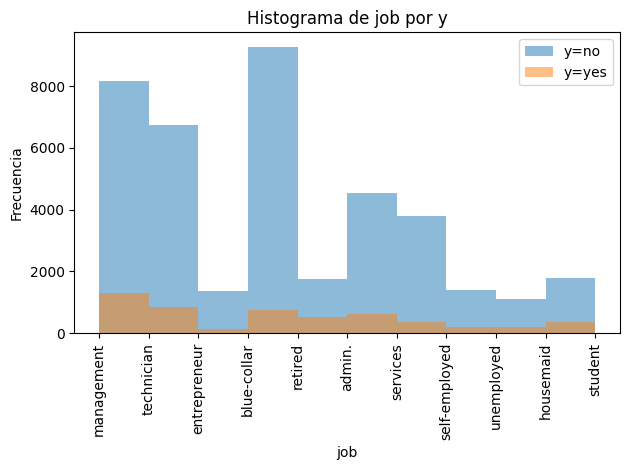

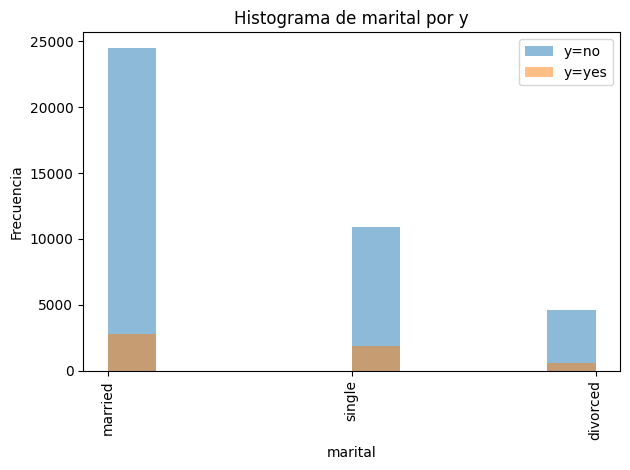

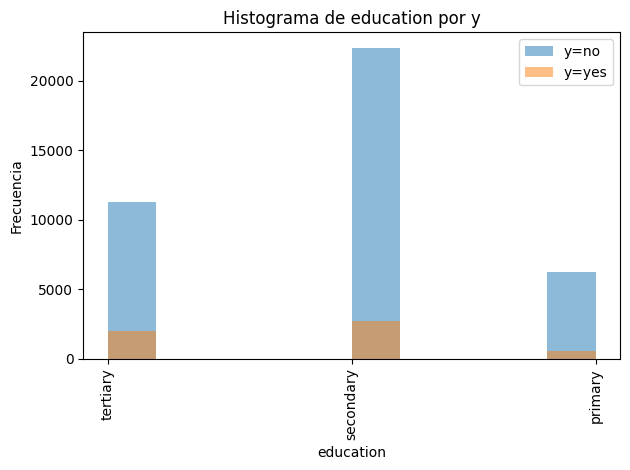

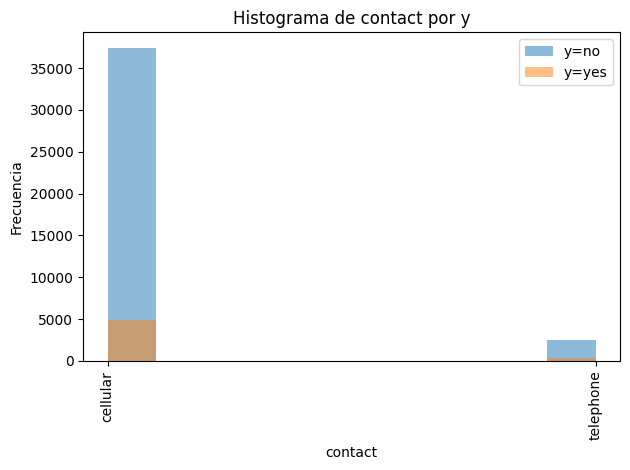

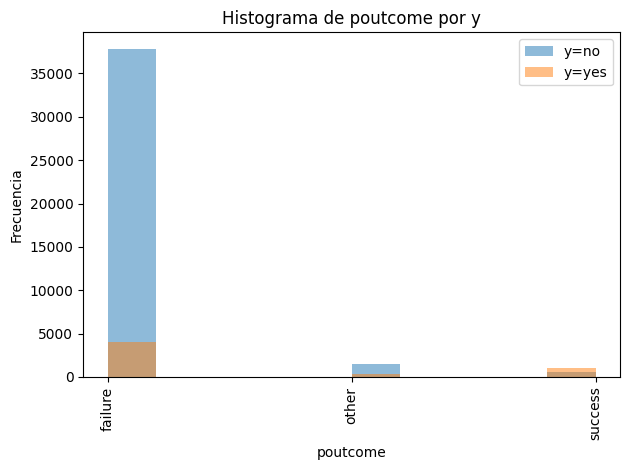

In [12]:
var_cat = ["job", "marital", "education","contact", "poutcome"]
target = "y"


for col in var_cat:
    fig, ax = plt.subplots()
    for group in consolidado[target].unique():
        data = consolidado[consolidado[target] == group][col].dropna()
        ax.hist(data, bins=10, alpha=0.5, label=f"{target}={group}")
    ax.set_title(f"Histograma de {col} por {target}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()




---


 Las variables categóricas más relevantes para determinar si el individuo hará un depósito, parecen ser, el outcome anterior, el estado civil, la manera de contactar.

---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

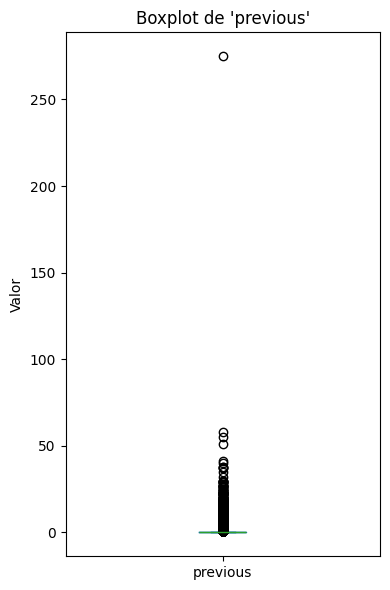

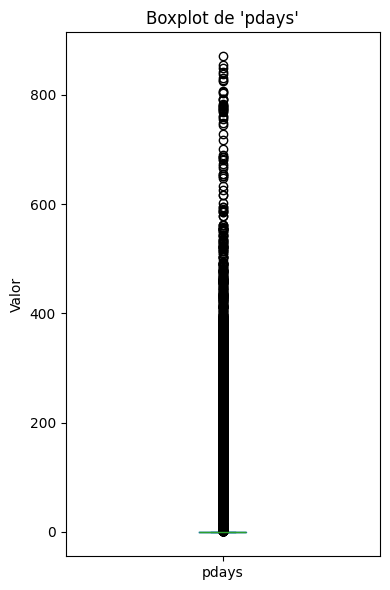

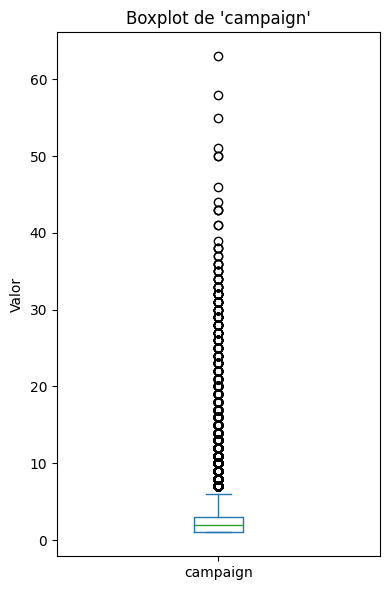

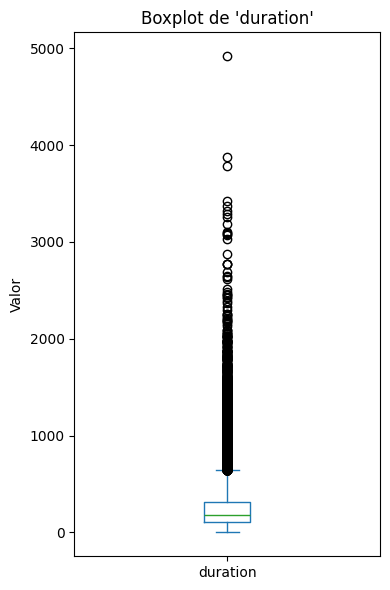

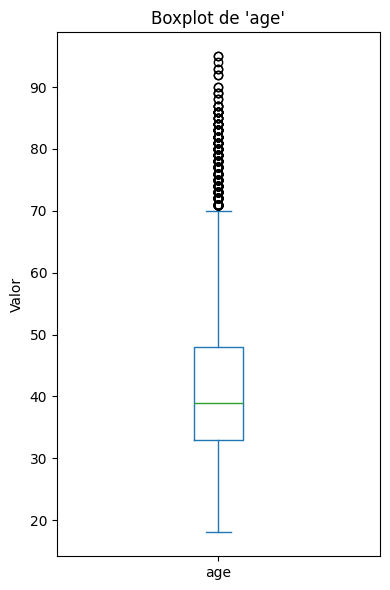

In [16]:
import matplotlib.pyplot as plt

num = ["previous", "pdays", "campaign", "duration", "age"]

for col in num:
    plt.figure(figsize=(4, 6))

    consolidado[col].plot.box()
    plt.title(f"Boxplot de '{col}'")
    plt.ylabel("Valor")
    plt.tight_layout()
    plt.show()





---


Decidimos dejar la mayoría, aunque son outliers, siguen siendo datos que estan muy juntos, puede tener sentido dejar la mayoria. Se eliminan los outliers que ya empiezan a estar solos.



---

In [17]:
consolidado = consolidado[consolidado["duration"] <= 3000]
consolidado = consolidado[consolidado["age"] <= 90]
consolidado = consolidado[consolidado["campaign"] <= 40]
consolidado = consolidado[consolidado["previous"] <= 30]


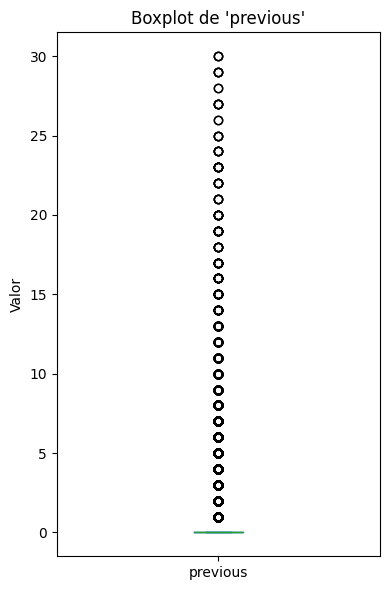

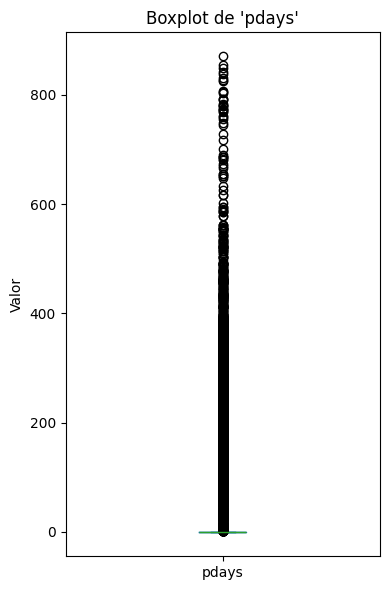

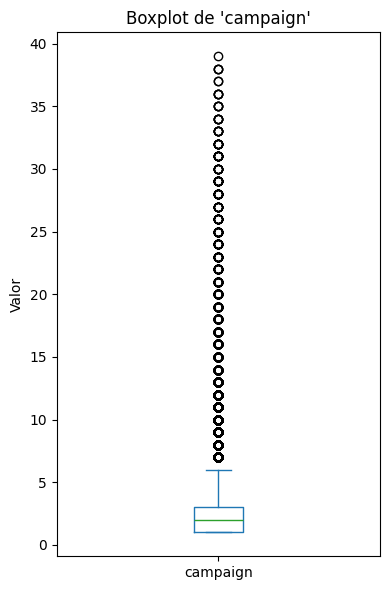

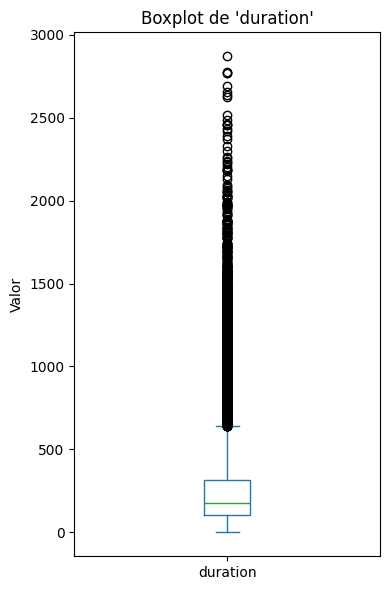

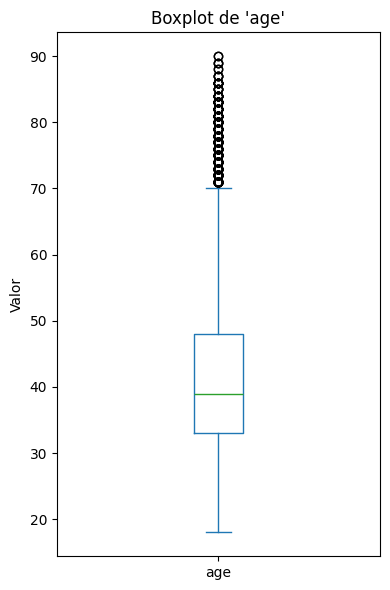

In [18]:
import matplotlib.pyplot as plt

num = ["previous", "pdays", "campaign", "duration", "age"]

for col in num:
    plt.figure(figsize=(4, 6))
    consolidado[col].plot.box()

    plt.title(f"Boxplot de '{col}'")
    plt.ylabel("Valor")
    plt.tight_layout()
    plt.show()


Ahora los datos están más juntos sin haber hecho tantos cambios en el dataset.

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas No Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [21]:
consolidado["education"].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [23]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
noBinCat= ["job","marital","education","poutcome"]
multinivel=["month","education"]
dummies=["contact"]
drop_cols=["day_of_week","job","marital","education","poutcome"]

preprocessor = ColumnTransformer([
    ("numericas",StandardScaler(),num),
    ("noBinCat",OneHotEncoder(), noBinCat),
    ("Dummies",OneHotEncoder(),dummies),

    ('ord_norm',
        Pipeline([
            ('ord', OrdinalEncoder(categories=[
                ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                ['tertiary', 'secondary', 'primary']
            ])),
            ('mm', MinMaxScaler())
        ]),
        multinivel),
        ("drop","drop",drop_cols)
])
pipeline = Pipeline([
    ('preproc', preprocessor)
])


print("Forma original:", X.shape)

X_proc = pipeline.fit_transform(consolidado)

Forma original: (45211, 16)


In [25]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [26]:
consolidado

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no


## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=123, stratify=y)

NameError: name 'X_proc' is not defined

### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

modelo_no_regularizado = DecisionTreeClassifier(class_weight='balanced' ,random_state=123)
modelo_no_regularizado.fit(X_train, y_train)

y_pred_train = modelo_no_regularizado.predict(X_train)
print("F1 Score (train):",modelo_no_regularizado.score(X_train, y_train))
print("F1 Score (test):",modelo_no_regularizado.score(X_test, y_test))



In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = pipeline.named_steps['preproc'].get_feature_names_out()


plt.figure(figsize=(24,12))
tree.plot_tree(
    modelo_no_regularizado,
    feature_names=feature_names,
    class_names=[str(c) for c in modelo_no_regularizado.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()






---


*Escriba* su respuesta en esta celda...


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

modelo_levemente_regularizado = DecisionTreeClassifier(class_weight='balanced' ,random_state=123, max_depth=16)
modelo_levemente_regularizado.fit(X_train, y_train)

y_pred_train = modelo_levemente_regularizado.predict(X_train)
print("F1 Score (train):",modelo_levemente_regularizado.score(X_train, y_train))
print("F1 Score (test):",modelo_levemente_regularizado.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = pipeline.named_steps['preproc'].get_feature_names_out()


plt.figure(figsize=(24,12))
tree.plot_tree(
    modelo_levemente_regularizado,
    feature_names=feature_names,
    class_names=[str(c) for c in modelo_levemente_regularizado.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()






---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

modelo_regularizado = DecisionTreeClassifier(class_weight='balanced' ,random_state=123, max_depth=8)
modelo_regularizado.fit(X_train, y_train)

y_pred_train = modelo_regularizado.predict(X_train)
print("F1 Score (train):",modelo_regularizado.score(X_train, y_train))
print("F1 Score (test):",modelo_regularizado.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = pipeline.named_steps['preproc'].get_feature_names_out()


plt.figure(figsize=(24,12))
tree.plot_tree(
    modelo_regularizado,
    feature_names=feature_names,
    class_names=[str(c) for c in modelo_regularizado.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

In [ ]:

# 2) Entrena 20 árboles con max_depth = 1..20 y calcula F1
depths = list(range(1, 21))
f1_train = []
f1_test = []

for n in depths:
    clf = DecisionTreeClassifier(
        max_depth=n,
        class_weight='balanced',
        random_state=123
    )
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    f1_train.append(clf.score(X_train,y_train))
    f1_test.append(clf.score(X_test,y_test))

# 3) Grafica F1 Train vs F1 Test
plt.figure(figsize=(8, 5))
plt.plot(depths, f1_train, marker='o', label='F1 Train')
plt.plot(depths, f1_test, marker='o', label='F1 Test')
plt.xlabel('max_depth (n)')
plt.ylabel('F1 Score (macro)')
plt.title('F1 Score en Train y Test vs Profundidad Máxima')
plt.xticks(depths)
plt.legend()
plt.tight_layout()
plt.show()




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [ ]:
# Importamos las librerías que usaremos en esta pregunta
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"n_estimators":[100, 1000] ,'max_depth': [10, 50, 100], 'min_samples_leaf': [2, 4]},] #combinación de parámetros
rf = RandomForestClassifier(random_state = 123, criterion='entropy', class_weight="balanced")

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)


In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 123, criterion='entropy', max_depth = 50, min_samples_leaf = 2)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [ ]:
from sklearn.model_selection import train_test_split

y.replace({'no': 0, 'yes': 1}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
from xgboost import XGBClassifier

param_grid = [{"n_estimators":[100, 1000] ,'max_depth': [5, 50, 100], 'learning_rate': [0.05, 0.1, 0.5], 'max_leaves':[2, 4, 10,]}] #combinación de parámetros
xgb = XGBClassifier(random_state = 12)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_train, y_train) #entrenamos el grid search
grid_search.best_params_

In [ ]:
xgb = XGBClassifier(random_state = 123, n_estimators=1000, max_depth=5, learning_rate=0.1, max_leaves=4)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test) ##accuracy en el test set

### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f1)




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).




---


*Escriba* su respuesta en esta celda...


---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv")


df = df.drop(['Series Code', 'Country Code'], axis=1)
df_wide = (
    df
    .pivot(index='Country Name',
           columns="Series Name",
           values='2023 [YR2023]')
    .reset_index()
)

df_wide= df_wide.drop("GDP growth (annual %)", axis=1)

### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [29]:
drop_countries=[
"Africa Eastern and Southern"
, "Africa Western and Central"
, "Arab World"
, "Caribbean small states"
, "Central Europe and the Baltics"
, "Early-demographic dividend"
, "East Asia & Pacific"
, "East Asia & Pacific (IDA & IBRD countries)"
, "East Asia & Pacific (excluding high income)"
, "Euro area"
, "Europe & Central Asia"
, "Europe & Central Asia (IDA & IBRD countries)"
, "Europe & Central Asia (excluding high income)"
, "European Union"
, "Fragile and conflict affected situations"
, "Heavily indebted poor countries (HIPC)"
, "High income"
, "IBRD only"
, "IDA & IBRD total"
, "IDA blend"
, "IDA only"
, "IDA total"
, "Late-demographic dividend"
, "Latin America & Caribbean"
, "Latin America & Caribbean (excluding high income)"
, "Latin America & the Caribbean (IDA & IBRD countries)"
, "Least developed countries: UN classification"
, "Low & middle income"
, "Low income"
, "Lower middle income"
, "Middle East & North Africa"
, "Middle East & North Africa (IDA & IBRD countries)"
, "Middle East & North Africa (excluding high income)"
, "Middle income"
, "North America"
, "Not classified"
, "OECD members"
, "Other small states"
, "Pacific island small states"
, "Post-demographic dividend"
, "Pre-demographic dividend"
, "Small states"
, "South Asia"
, "South Asia (IDA & IBRD)"
, "Sub-Saharan Africa"
, "Sub-Saharan Africa (IDA & IBRD countries)"
, "Sub-Saharan Africa (excluding high income)"
, "Upper middle income"
, "World"
]
df_wide = df_wide[~df_wide['Country Name'].isin(drop_countries)]

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [30]:
import numpy as np
df_wide.replace("..", np.nan, inplace=True)
cols_to_numeric = [c for c in df_wide.columns if c != "Country Name"]

df_wide[cols_to_numeric] = df_wide[cols_to_numeric].apply(pd.to_numeric, errors="coerce")


<ipython-input-30-f562e1a94459>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_wide.replace("..", np.nan, inplace=True)


In [31]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 265
Data columns (total 16 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Country Name                                                                                                       217 non-null    object 
 1   Agricultural raw materials exports (% of merchandise exports)                                                      149 non-null    float64
 2   Computer; communications and other services (% of commercial service exports)                                      161 non-null    float64
 3   Exports of goods and services (% of GDP)                                                                           158 non-null    float64
 4   Food exports (% of merchandise 

In [32]:
df_wide.describe()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
count,149.000000,161.000000,158.000000,149.000000,145.000000,147.000000,157.000000,152.000000,0.0,149.000000,205.000000,192.000000,149.000000,22.000000,161.000000
mean,2.726255,35.005284,45.398868,24.136526,14.275881,11.352849,10.234009,5.732781,NaN,42.098438,60.914241,5.096570,9.476862,2.624425,20.583359
std,7.416283,23.550764,33.331007,23.862474,23.215387,13.507894,11.534976,7.703914,NaN,29.236666,24.978469,11.628976,15.470820,4.899022,16.870115
min,0.000000,0.935706,1.108109,0.079874,0.000000,0.000000,0.043145,0.008135,NaN,0.210353,0.121224,0.000034,0.000000,0.000002,0.663447
25%,0.343928,13.309551,23.637110,8.338115,0.498740,2.226174,2.681207,1.319000,NaN,15.347126,43.902677,0.244645,1.353868,0.046153,7.784412
50%,0.794963,32.273353,38.790357,15.056512,4.097826,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129
75%,2.120083,53.862266,56.494967,32.790842,15.770449,16.841983,12.745838,7.163361,NaN,68.665103,82.370504,3.269713,8.391231,1.419763,27.632283
max,63.703068,95.860793,212.530618,98.210416,95.516439,72.315489,61.766896,55.672826,NaN,94.990393,97.770966,96.949670,76.471800,15.578989,86.950670


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

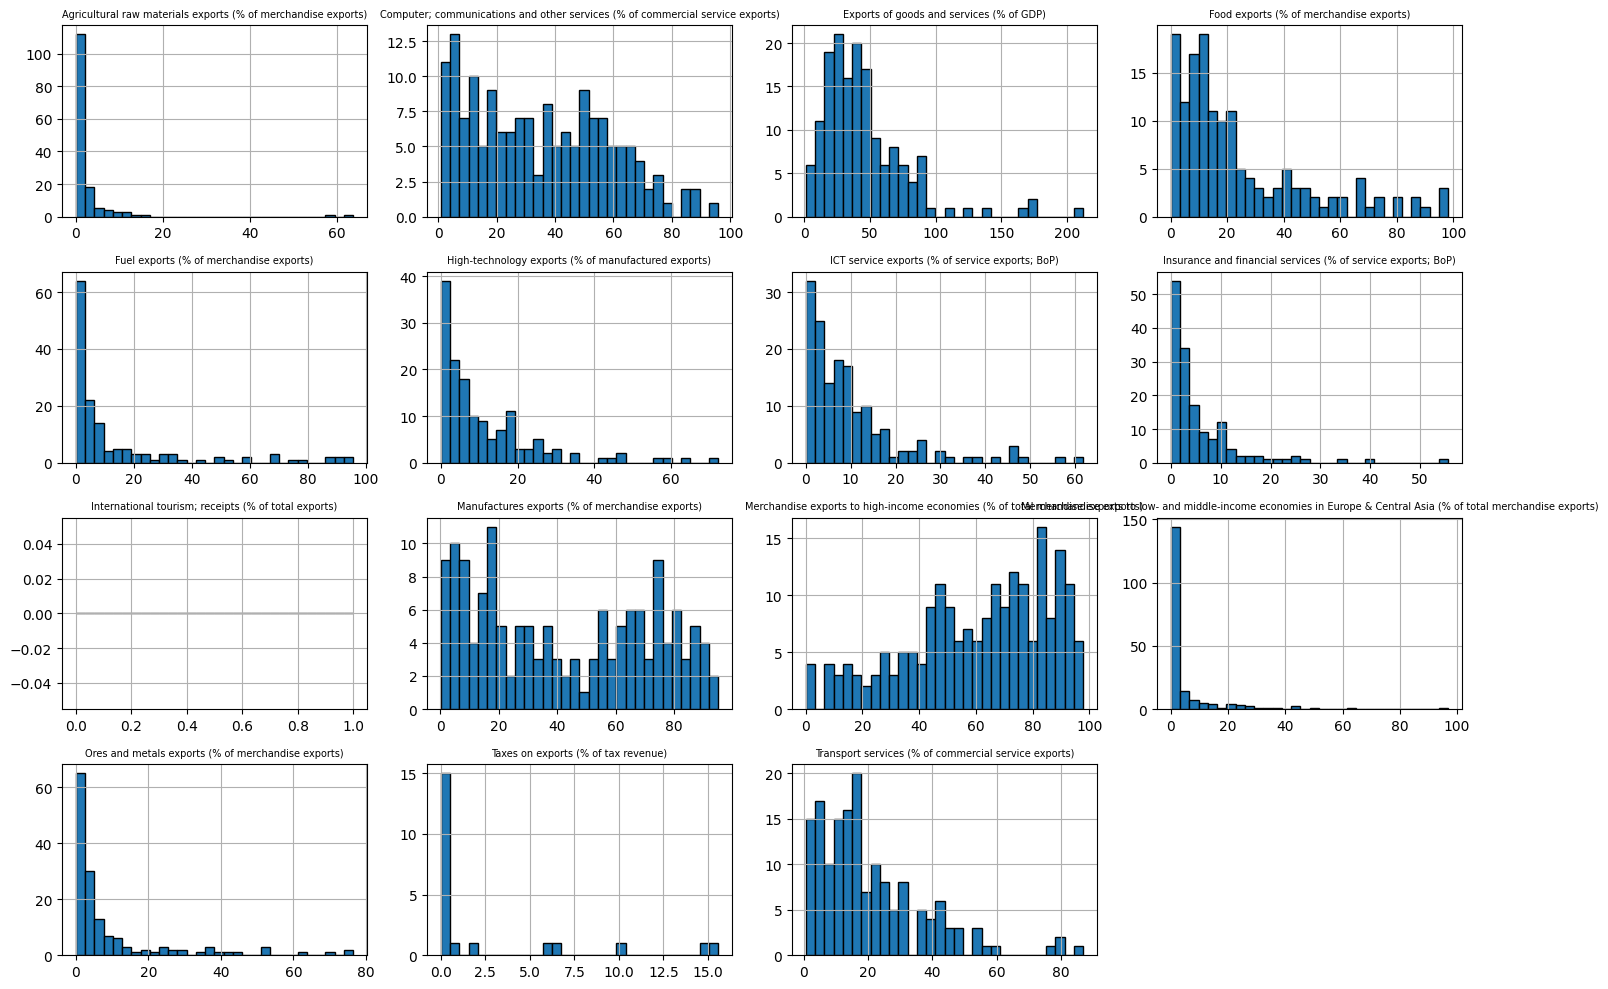

In [33]:
col = df_wide.columns.tolist()

axes = df_wide.hist(bins=30, figsize=(15, 10), edgecolor='black')

for ax in axes.flatten():
    ax.title.set_fontsize(7)

plt.tight_layout()
plt.show()




---

Agricultural raw materials exports: La gran mayoría está cercano al 0, salvo algunos paises que probablemente se especializan en este tipo de exportaciones.

Computer; communications and other services: Esta variable tiene una distribución más pareja que la gran mayoría de las exportaciones, la moda está cercana al 0, pero hay (pocos) países que sí tienen altos porcentajes.

Food exports: Esta variable tiene una distribución más pareja que la gran mayoría de las exportaciones, la moda está cercana al 0, pero hay (pocos) países que sí tienen altos porcentajes.

Fuel exports: La gran mayoría está cercano al 0, salvo algunos paises que
probablemente se especializan en este tipo de exportaciones.

High-technology exports: La gran mayoría está cercano al 0, salvo algunos paises que probablemente se especializan en este tipo de exportaciones.

ICT service exports: La gran mayoría está cercano al 0, salvo algunos paises que probablemente se especializan en este tipo de exportaciones.

Insurance and financial services: La gran mayoría está cercano al 0, salvo algunos paises que probablemente se especializan en este tipo de exportaciones.

International tourism: No hay datos para esta variable.

Manufactures exports: Esta variable tiene una distribución más pareja que la gran mayoría de las exportaciones, la moda está cercana al 0, pero hay (pocos) países que sí tienen altos porcentajes.

Merchandise exports to high-income economies: Esta variable tiene una moda cercana al 90%, debido a la medición. Es decir, la gran mayoría de las manufacturas se exportan a países de altos ingresos. Hay pocos países cuyas exportaciones de manufacturas a países ricos son bajas.

Merchandise exports to low- and middle-income economies in Europe & Central
Asia: La gran mayoría está cercano al 0, salvo algunos paises que probablemente se especializan en este tipo de exportaciones

Ores and metals exports: La gran mayoría está cercano al 0, salvo algunos paises que probablemente se especializan en este tipo de exportaciones.

Taxes on exports: Aquí hay distintos números. La mayoría está cerca del 0 pero hay algunos paises con 10% o incluso 15% de tarifas a la exportación.

Transport services: Esta variable tiene una distribución más pareja que la gran mayoría de las exportaciones, la moda está cercana al 0, pero hay (pocos) países que sí tienen altos porcentajes.

---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


Primero contamos los missings. Claramente hay que botar International tourism y taxes on exports. Nos quedamos con 14 columnas de datos.

In [34]:
total_missings = df_wide.isnull().sum().sort_values(ascending=False)
percent_missings = (total_missings/df_wide.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_missings, percent_missings], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Series Name,,
International tourism; receipts (% of total exports),217,100.000000
Taxes on exports (% of tax revenue),195,89.861751
Fuel exports (% of merchandise exports),72,33.179724
High-technology exports (% of manufactured exports),70,32.258065
Manufactures exports (% of merchandise exports),68,31.336406
Ores and metals exports (% of merchandise exports),68,31.336406
Agricultural raw materials exports (% of merchandise exports),68,31.336406
Food exports (% of merchandise exports),68,31.336406
Insurance and financial services (% of service exports; BoP),65,29.953917


In [35]:
df_wide = df_wide.drop(['Taxes on exports (% of tax revenue)', 'International tourism; receipts (% of total exports)'], axis=1)

In [36]:
na_por_fila = df_wide.isna().sum(axis=1)
dist_na = na_por_fila.value_counts().sort_index()

print("Conteo de filas según número de NA:")
print(dist_na)


Conteo de filas según número de NA:
0     102
1      26
2       4
3       1
4       9
5       3
6      14
7      15
8       2
9       1
10     15
11     14
12      2
13      9
Name: count, dtype: int64


In [37]:
df_wide = df_wide[~na_por_fila.isin([10, 11, 12, 13])]

Volveremos a usar el método de ChatGPT para poder comparar 4 distintos métodos de reemplazar missings.

In [38]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge


num_cols = df_wide.select_dtypes(include='number').columns.tolist()
df_numeric = df_wide[num_cols].copy()


rng = np.random.RandomState(123)

# Creamos una matriz booleana “posibles_mask” que sea True donde df_numeric NO es NA
posibles_mask = df_numeric.notna().values  # array booleana (n_filas × n_cols)

# Ahora generamos aleatoriamente un 10% de True en toda la matriz
aleatorio_10 = rng.rand(*df_numeric.shape) < 0.1  # también (n_filas × n_cols)

# La máscara final “mask” solo marca True en aquellas celdas que
#    • originalmente no eran NA  → posibles_mask == True
#    • y fueron seleccionadas aleatoriamente    → aleatorio_10 == True
mask = posibles_mask & aleatorio_10

# -------------------------------------------------------------------
# 3) Guardamos los valores verdaderos ANTES de enmascarar
#    De esta forma podemos compararlos luego con la imputación
true_vals = df_numeric.values[mask]  # array unidimensional de valores reales

# 4) Creamos una copia y ponemos esos valores a np.nan
df_masked = df_numeric.copy()
df_masked.values[mask] = np.nan

# -------------------------------------------------------------------
# 5) Definimos los imputadores a comparar
imputers = {
    'SimpleMean': SimpleImputer(strategy='mean'),
    'KNNImputer': KNNImputer(n_neighbors=5),
    'MICE_Tree': IterativeImputer(
        estimator=DecisionTreeRegressor(max_depth=5, random_state=123),
        max_iter=10,
        random_state=123
    ),
    'MICE_Bayesian': IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=123
    )
}

# 6) Aplicar cada imputador y calcular métricas (RMSE y MAE) SOLO sobre las celdas enmascaradas
results = []
for name, imputer in imputers.items():
    # a) Ajusta al df_masked y devuelve un array imputado
    arr_imputed = imputer.fit_transform(df_masked)

    # b) Reconstruir un DataFrame con los mismos índices y columnas
    imputed_df = pd.DataFrame(arr_imputed, columns=df_numeric.columns, index=df_numeric.index)

    # c) Extraer los valores imputados en las posiciones “mask”
    pred_vals = imputed_df.values[mask]

    # d) Calcular RMSE y MAE comparando true_vals vs pred_vals
    rmse = np.sqrt(mean_squared_error(true_vals, pred_vals))
    mae  = mean_absolute_error(true_vals, pred_vals)

    results.append({
        'Method': name,
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

# 7) Mostrar resultados comparativos
results_df = pd.DataFrame(results)
from IPython.display import display
display(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Method,RMSE,MAE
0,SimpleMean,21.1140,15.3898
1,KNNImputer,20.1501,13.9632
2,MICE_Tree,20.9710,13.6995
3,MICE_Bayesian,18.3663,12.8014


El mejor método es el Bayesiano, así que lo utilizamos para reemplazar las columnas.

In [39]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# 1. Identifica las columnas numéricas de df_wide
numeric_cols = df_wide.select_dtypes(include='number').columns.tolist()

# 2. Configura el imputer con BayesianRidge
mice_bayesian = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=123
)

# 3. Fit-transform SOLO sobre las columnas numéricas
array_imputado = mice_bayesian.fit_transform(df_wide[numeric_cols])

# 4. Reconstruye un DataFrame con los mismos nombres e índices
df_transitorio = pd.DataFrame(
    array_imputado,
    columns=numeric_cols,
    index=df_wide.index
)

# 5. Reemplaza las columnas numéricas en df_wide por las imputadas
df_wide[numeric_cols] = df_transitorio



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

In [40]:
def identify_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
  return df_outliers

In [41]:
col = df_wide.columns.tolist()[1:]
cantidad_outliers = []
for columna in col:
  df_aux = identify_outliers(df_wide, columna)
  cantidad_outliers.append(len(df_aux))

df_outliers = pd.DataFrame({
    'Variable': col,
    'Valor': cantidad_outliers
})
df_outliers = df_outliers.sort_values(by="Valor", ascending=False)
df_outliers

,Variable,Valor
0,Agricultural raw materials exports (% of merch...,22
10,Merchandise exports to low- and middle-income ...,21
4,Fuel exports (% of merchandise exports),17
11,Ores and metals exports (% of merchandise expo...,17
6,ICT service exports (% of service exports; BoP),14
7,Insurance and financial services (% of service...,12
5,High-technology exports (% of manufactured exp...,10
2,Exports of goods and services (% of GDP),9
3,Food exports (% of merchandise exports),9
12,Transport services (% of commercial service ex...,6


Vemos que hay outliers pero no hay tantos, vamos a hacer zoom en los outliers de cada variable.

In [42]:
num_cols = df_wide.select_dtypes(include='number').columns.tolist()
df_numeric = df_wide[num_cols].copy()

In [45]:
data = []
datos = []
for col in num_cols:
    series = df_wide[col].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 + 1.5 * IQR
    outlier_values = series[series > threshold].tolist()
    outlier_str = ", ".join([str(v) for v in outlier_values]) if outlier_values else ""
    data.append({
        'Column': col,
        'Threshold (Q3 + 1.5×IQR)': threshold,
        'Num Outliers': len(outlier_values),
        'Outlier Values': outlier_str
    })
    datos.append({"outliers": (threshold,outlier_values)})
outliers_df = pd.DataFrame(data)
print(outliers_df.to_string())

                                                                                                               Column  Threshold (Q3 + 1.5×IQR)  Num Outliers                                                                                                                                                                                                                                                                                                                                                                            Outlier Values
0                                                       Agricultural raw materials exports (% of merchandise exports)                  6.714858            19                             7.428570496831932, 7.792741783344631, 58.1404591119706, 10.81211664297009, 11.6748806347761, 12.6077414739267, 9.67258056201782, 6.78824390461196, 12.728009086600368, 12.5710697931939, 9.7771245101759, 63.7030677905837, 6.86239495247464, 13.865102681718755, 9.76535916563518, 13

Como podemos ver, hay variables que tienen outliers, algunos se pasan un poco, otros se pasan mucho. Vamos a sacar los outliers que se pasen demasiado. Esto es un criterio al ojo.

In [46]:
df_final = df_wide[df_wide["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"] <= 29]
df_final = df_final[df_final["Agricultural raw materials exports (% of merchandise exports)"]<=13]
df_final = df_final[df_final["Exports of goods and services (% of GDP)"]<=101]
df_final = df_final[df_final["Food exports (% of merchandise exports)"]<=73]
df_final = df_final[df_final["Fuel exports (% of merchandise exports)"]<=42]
df_final = df_final[df_final["High-technology exports (% of manufactured exports)"]<=44]
df_final = df_final[df_final["ICT service exports (% of service exports; BoP)"]<=33]
df_final = df_final[df_final["Insurance and financial services (% of service exports; BoP)"]<=28]
df_final = df_final[df_final["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"]<=16]
df_final = df_final[df_final["Ores and metals exports (% of merchandise exports)"]<=16]
df_final = df_final[df_final["Transport services (% of commercial service exports)"]<=25]

In [47]:
len(df_final)

72




---

Pero hay un problema, si hacemos esto, vamos a reducir casi en un tercio el número de observaciones. Aquí hay un punto clave, cómo los paises se especializan, es normal que un país sea un outlier en alguna variable. Por ejemplo Chile, que su comercio se basa principalmente en la exportación minera, es normal que sea un outlier, así como todos los paises tienen su rubro principal.

Además, como las variables están en porcentaje, puede haber outliers pero ninguno que se escape totalmente para sesgar completamente el análisis. Por estas dos razones, optamos en dejar los outliers.


---


In [48]:
df_final = df_wide

## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [49]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist #

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])
df_final

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Transport services (% of commercial service exports)
3,Albania,-0.339425,-0.458009,-0.190470,-0.589306,-0.358899,-0.806270,-0.653467,-0.719238,0.577711,0.646142,1.226438,-0.312176,-0.590697
4,Algeria,0.649496,0.856466,-0.668069,-0.579939,-0.175236,0.019835,-0.722862,0.609249,0.084442,0.750056,0.097486,0.055475,0.305515
6,Andorra,-0.338108,-0.895086,0.534126,-1.079300,-0.656745,0.858924,-0.537791,-0.295896,1.962589,0.780358,-0.036391,-0.560329,-1.162248
7,Angola,-0.396216,0.866931,-0.120898,-1.108057,3.770157,1.022358,3.020617,0.610899,-1.428225,-1.176247,-0.446546,-0.382184,0.623925
8,Antigua and Barbuda,-0.396603,-1.160000,-0.024376,2.455661,-0.657222,-0.861021,-0.872063,-0.008501,-0.726955,1.105059,-0.437995,-0.683454,-0.926311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Uruguay,1.586914,0.434205,-0.544959,1.852598,-0.645522,-0.001858,0.679229,-0.108227,-0.774299,-1.318758,-0.139941,-0.658796,-0.623419
256,Uzbekistan,-0.200263,-0.661492,-0.665838,-0.735091,-0.447352,-0.634548,-0.211317,-0.441278,-0.209614,-1.065637,2.673129,-0.101061,1.093967
261,West Bank and Gaza,-0.289147,0.554507,-0.795878,-0.164334,-0.653179,-0.713100,0.150528,-0.451844,0.819829,1.192257,-0.320126,0.318220,-1.183287
264,Zambia,-0.315596,-1.144280,-0.121236,-0.650101,-0.464566,-0.767654,-0.682301,-0.662449,-1.001650,-0.478153,-0.444722,4.269042,-0.845444


## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



Text(0.5, 1.0, 'Elbow curve')

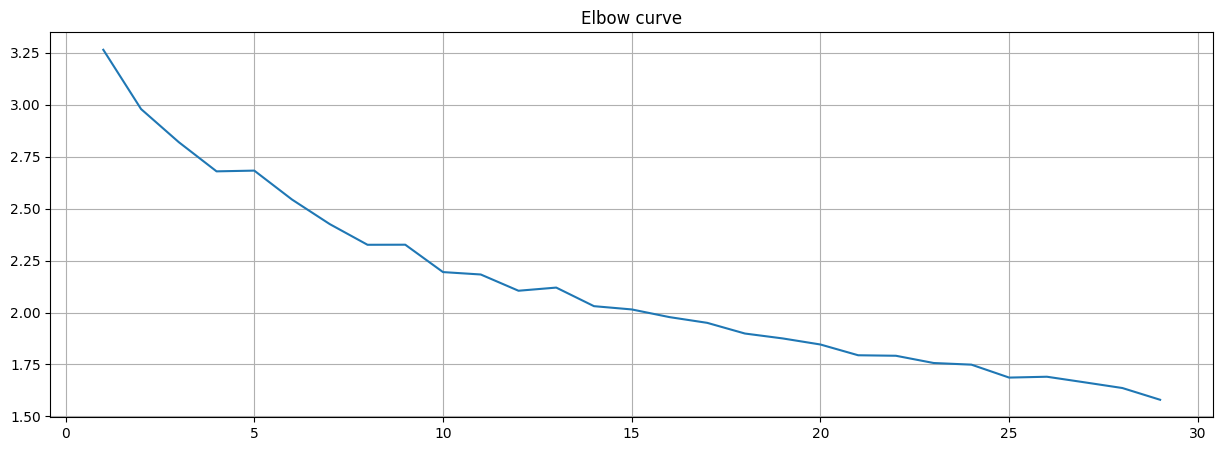

In [50]:
import matplotlib.pyplot as plt

dispersion = []
df_muestra= df_final.drop("Country Name", axis=1)


for k in range(1, 30):
  model = KMeans(n_clusters=k)
  model.fit(df_muestra)
  #Distancia euclidiana para cada par (dato - centro del cluster)
  dist_ecl = cdist(df_muestra, model.cluster_centers_, 'euclidean')
  #Tomamos la distancia mínima (al centroide más cercano)
  min_dist = np.min(dist_ecl, axis=1)
  #Promediamos: sumamos todas las mínimas distincia y dividimos por la cantidad de datos
  average_dis = sum(min_dist)/len(df_muestra)
  dispersion.append(average_dis)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 30), dispersion)
plt.grid(True)
plt.title('Elbow curve')




---


Vemos, tal como esperamos, que la curva es decreciente frente a un mayor número de clusters. Según el Elbow method, los clusters ya no son tan informativos marginalmente para k=4.


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


Primero veamos el approach estadístico a ver cuáles muestran mayor indicio de ser variables diferenciadoras. Probemos viendo las correlaciones.

<ipython-input-51-f914bec8cb73>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


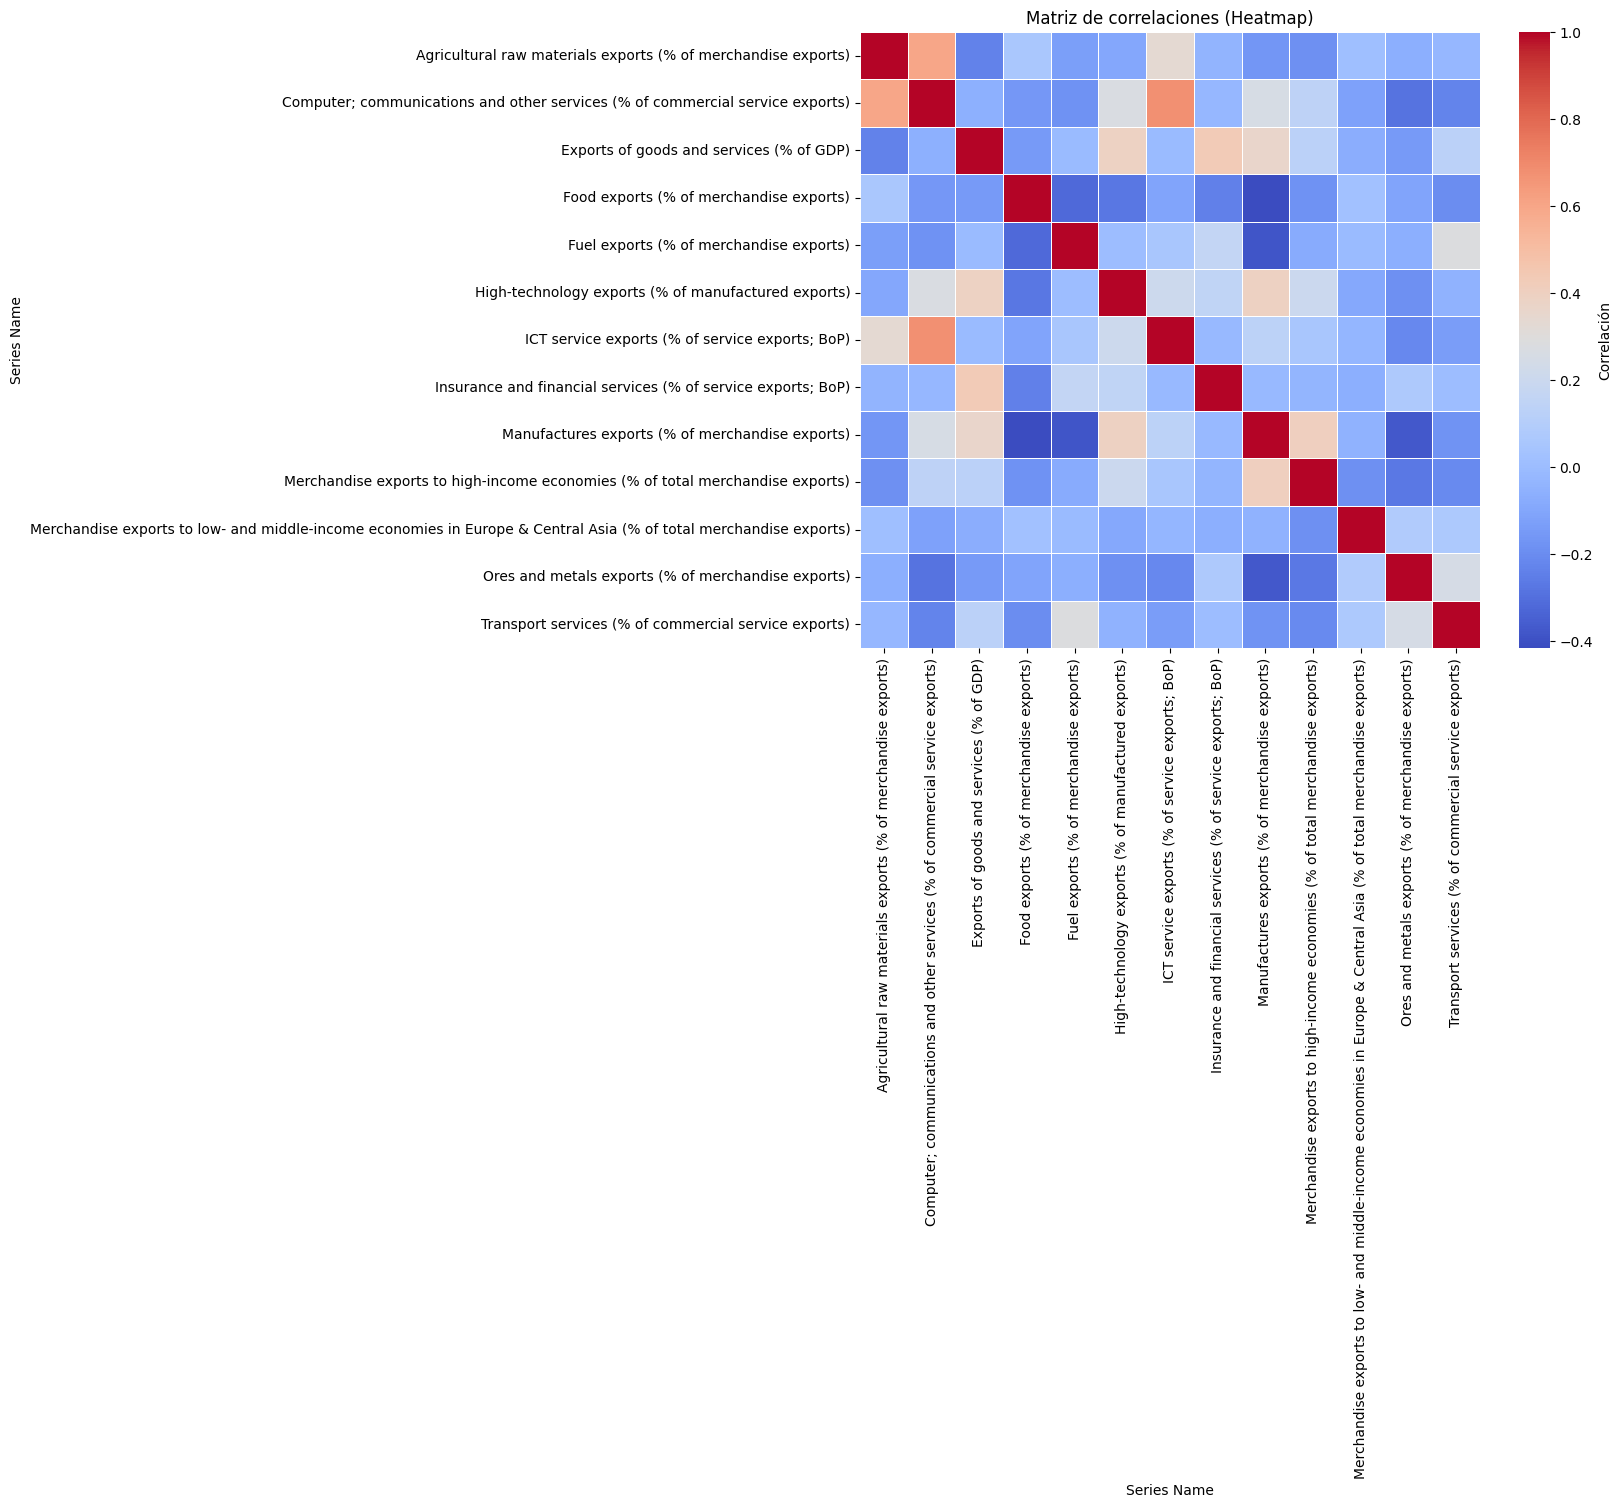

In [51]:
corr = df_muestra.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Correlación"}
)
plt.title("Matriz de correlaciones (Heatmap)")
plt.tight_layout()
plt.show()

En base a esto, vamos a tomar las variables tengan más correlación con otras, pero que estén lo menos correlacionadas entre ellas. Así podemos capturar la mayor varianza posible.

In [52]:
columnas=[["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)"],
         ["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)","High-technology exports (% of manufactured exports)"],
         ["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"],
         ["Exports of goods and services (% of GDP)","Merchandise exports to high-income economies (% of total merchandise exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)","High-technology exports (% of manufactured exports)"],
         ["Exports of goods and services (% of GDP)","High-technology exports (% of manufactured exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"]
         ]

Vamos a gráficar las curvas de los kmeans para cada combinación de variables.

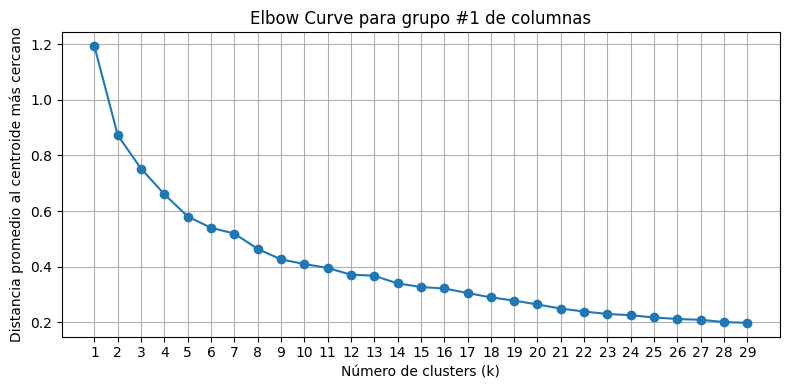

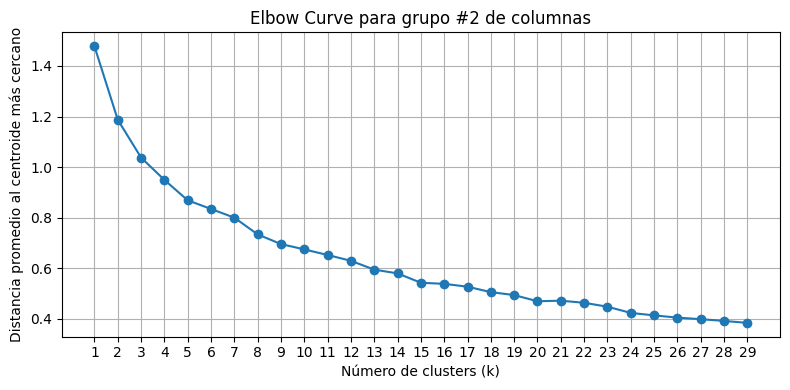

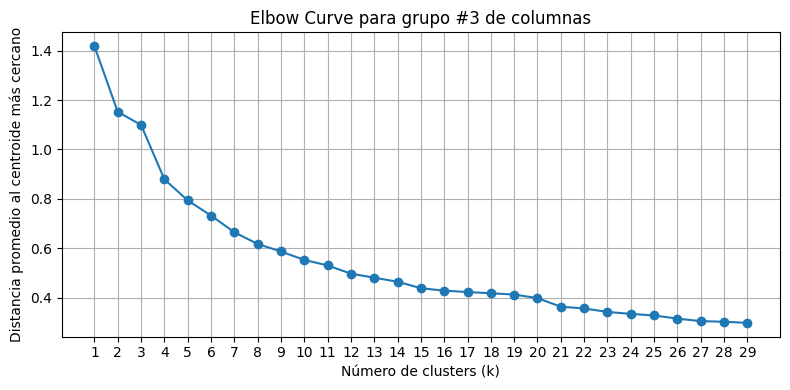

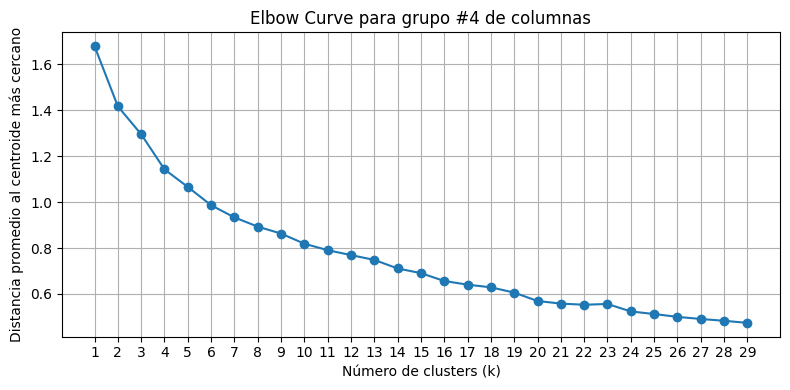

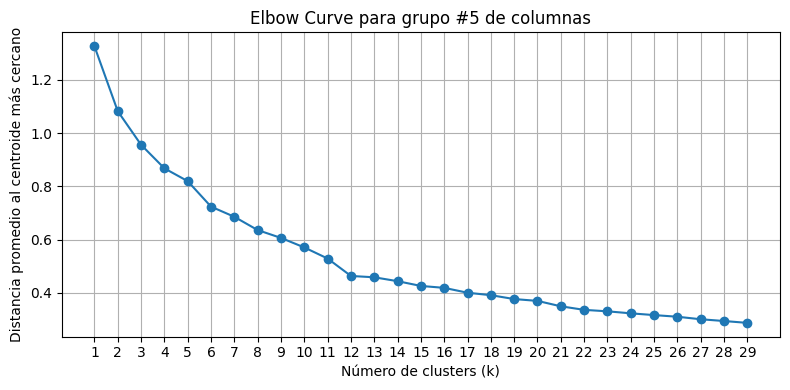

In [53]:
for i, group in enumerate(columnas):
    X_grp = df_muestra[group]
    dispersion = []
    ks = list(range(1, 30))

    for k in ks:
        model = KMeans(n_clusters=k, random_state=0)
        model.fit(X_grp)
        dist_ecl = cdist(X_grp, model.cluster_centers_, metric='euclidean')
        min_dist = np.min(dist_ecl, axis=1)
        average_dis = np.mean(min_dist)
        dispersion.append(average_dis)

    plt.figure(figsize=(8, 4))
    plt.plot(ks, dispersion, marker='o', linestyle='-')
    plt.grid(True)
    plt.title(f'Elbow Curve para grupo #{i+1} de columnas')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Distancia promedio al centroide más cercano')
    plt.xticks(ks)
    plt.tight_layout()
    plt.show()

Vamos a utilizar el método de silhouette score para evaluar el desempeño de la clusterización kmeans con distintos conjuntos de variables. Este score mide que tan bien está cada punto asignado a su cluster.

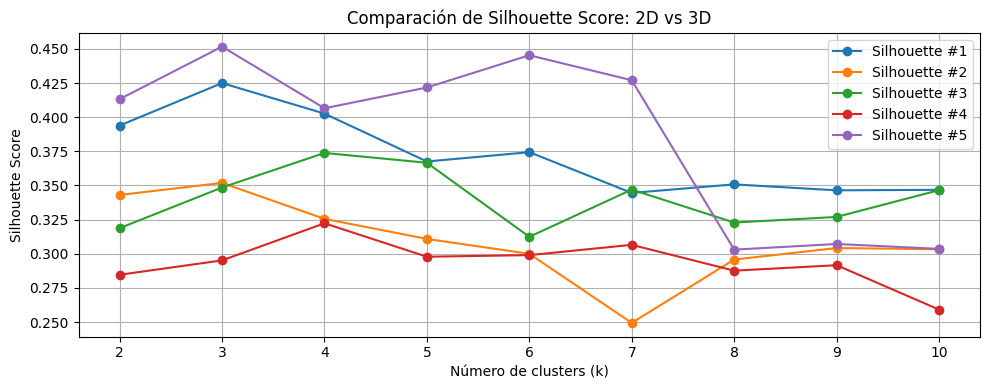

   grupo  n_clusters  silhouette
1     #1           3    0.424995
10    #2           3    0.351891
20    #3           4    0.373830
29    #4           4    0.322312
37    #5           3    0.451668


In [54]:
from sklearn.metrics import silhouette_score

resultados_sil = {
    'grupo': [],
    'n_clusters': [],
    'silhouette': []
}

for nombre_grupo, cols in [('#1', columnas[0]), ('#2', columnas[1]),("#3",columnas[2]),("#4",columnas[3]),("#5",columnas[4])]:
    X = df_muestra[cols].dropna()
    for k in range(2, 11):
        model = KMeans(n_clusters=k, random_state=0)
        etiquetas = model.fit_predict(X)
        sil = silhouette_score(X, etiquetas)
        resultados_sil['grupo'].append(nombre_grupo)
        resultados_sil['n_clusters'].append(k)
        resultados_sil['silhouette'].append(sil)

df_sil = pd.DataFrame(resultados_sil)

plt.figure(figsize=(10, 4))
for nombre_grupo, df_sub in df_sil.groupby('grupo'):
    plt.plot(
        df_sub['n_clusters'],
        df_sub['silhouette'],
        marker='o',
        label=f"Silhouette {nombre_grupo}"
    )

plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Comparación de Silhouette Score: 2D vs 3D")
plt.legend()
plt.grid(True)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()

mejores = df_sil.loc[df_sil.groupby('grupo')['silhouette'].idxmax()]
print(mejores)

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


Vamos a usar la combinación 5, ya que esta presenta mejor desempeño:

"Exports of goods and services (% of GDP)", "High-technology exports (% of manufactured exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"

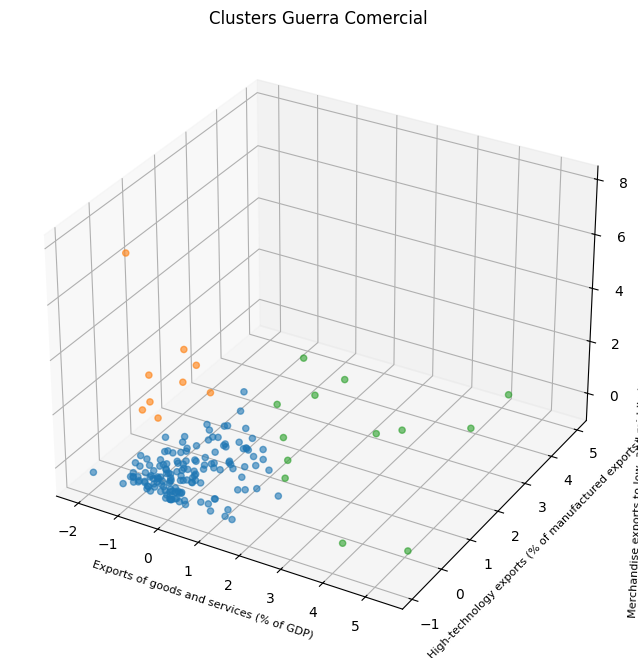

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

var1 = "Exports of goods and services (% of GDP)"
var2 = "High-technology exports (% of manufactured exports)"
var3 = "Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"

df_aux = df_muestra[[var1, var2, var3]]
model = KMeans(n_clusters=3)
model.fit(df_aux)


labels = model.labels_
colors = plt.cm.tab10(labels)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_aux[var1], df_aux[var2], df_aux[var3], c=colors, alpha=0.6)

# Etiquetas
ax.set_xlabel(var1, fontsize=8)
ax.set_ylabel(var2, fontsize=8)
ax.set_zlabel(var3, fontsize=8)
ax.set_title("Clusters Guerra Comercial", fontsize=12)

plt.show()

In [56]:
df_final['cluster'] = model.labels_
df_clustered = df_final[['Country Name', 'cluster',"Exports of goods and services (% of GDP)", "High-technology exports (% of manufactured exports)","Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"]]

In [57]:
df_clustered = df_clustered.sort_values(by='cluster')

In [58]:
df_subset = df_clustered[df_clustered['cluster'] == 0]
print(df_subset["Exports of goods and services (% of GDP)"].mean())
print(df_subset["High-technology exports (% of manufactured exports)"].mean())
print(df_subset["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"].mean())

-0.1533170002463093
-0.17311220548899353
-0.1820866242214239


In [59]:
df_subset.head(10)

Series Name,Country Name,cluster,Exports of goods and services (% of GDP),High-technology exports (% of manufactured exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
3,Albania,0,-0.190470,-0.806270,1.226438
4,Algeria,0,-0.668069,0.019835,0.097486
6,Andorra,0,0.534126,0.858924,-0.036391
7,Angola,0,-0.120898,1.022358,-0.446546
8,Antigua and Barbuda,0,-0.024376,-0.861021,-0.437995
10,Argentina,0,-1.013131,-0.423738,-0.357140
11,Armenia,0,0.469383,0.832484,-0.043921
12,Aruba,0,1.386507,-0.309922,0.033143
13,Australia,0,-0.567134,1.165739,-0.425504
14,Austria,0,0.469779,0.416685,-0.213722


In [60]:
df_subset = df_clustered[df_clustered['cluster'] == 1]
print(df_subset["Exports of goods and services (% of GDP)"].mean())
print(df_subset["High-technology exports (% of manufactured exports)"].mean())
print(df_subset["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"].mean())

-0.4483118387659085
-0.3693249824867559
3.5942854196470577


In [61]:
df_subset.head(10)

Series Name,Country Name,cluster,Exports of goods and services (% of GDP),High-technology exports (% of manufactured exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
129,Kyrgyz Republic,1,-0.174688,0.629297,1.981686
86,Gambia,1,-1.112956,-0.673070,7.874904
127,Kosovo,1,-0.159508,-0.237699,3.234004
166,Montenegro,1,0.167803,-0.219475,3.982852
87,Georgia,1,0.146074,-0.557806,4.873130
211,Sierra Leone,1,-0.734573,-0.785721,2.495858
237,Tajikistan,1,-0.816020,-0.462567,3.420810
256,Uzbekistan,1,-0.665838,-0.634548,2.673129
202,Russian Federation,1,-0.685101,-0.382337,1.812197


In [62]:
df_subset = df_clustered[df_clustered['cluster'] == 2]
print(df_subset["Exports of goods and services (% of GDP)"].mean())
print(df_subset["High-technology exports (% of manufactured exports)"].mean())
print(df_subset["Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"].mean())

2.138380122082394
2.3197166687057544
-0.3173186171156011


In [63]:
df_subset.head(15)

Series Name,Country Name,cluster,Exports of goods and services (% of GDP),High-technology exports (% of manufactured exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
173,Netherlands,2,1.392643,1.074086,-0.298865
153,Malta,2,2.479176,2.610966,-0.344874
110,Iceland,2,-0.032432,2.623425,-0.386824
56,Cyprus,2,1.661884,0.625154,-0.382624
40,Cayman Islands,2,0.680508,2.966607,-0.047520
59,Djibouti,2,3.950179,-0.598190,-0.392967
146,Luxembourg,2,5.328637,-0.375420,-0.232277
150,Malaysia,2,0.759195,3.906562,-0.330181
103,Hong Kong,2,4.193147,4.941674,-0.391740
115,Ireland,2,2.869389,2.972413,-0.396122


---


Utilizando el criterio del codo en la pregunta anterior, el óptimo es de 3 clusters.

Podemos ver primero, que hay un cluster donde se exportan pocas mercancías a economías de bajos ingresos, pero si se exporta tecnología, bienes y servicios. Como por ejemplo Dinamarca, Andorra, Corea.

En el segundo cluster tenemos países que son bajos exportadores en las 3 dimensiones analizadas, como es el caso de  Chile, Canada, Costa rica (que basicamente exportan otras cosas).

El tercer cluster tiene muchas merchandise exports to low and middle income economies y bajas exportaciones de bienes y servicios y tecnología. Entre ellos están Georgia, Montengro, Kosovo, que ciertamente no son muy conocidos por exportar bienes y servicios.




---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


[0.2125573 0.1674997]
El total de la varianza explicada por PCA:  38.01 %


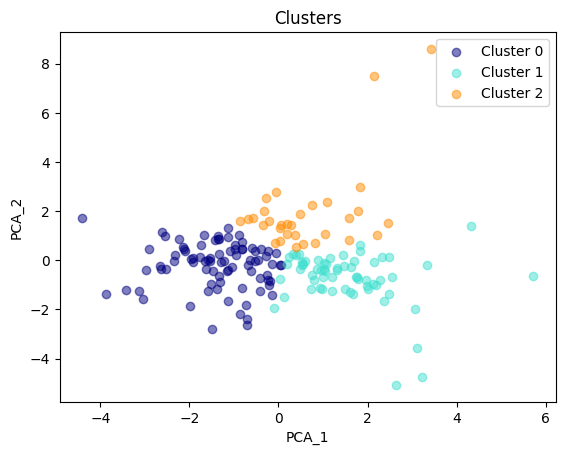

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_muestra)
var_exp = pca.explained_variance_ratio_
print(var_exp)
print('El total de la varianza explicada por PCA: ',round(sum(var_exp),4)*100,'%')

model = KMeans(n_clusters=3)
model.fit(df_pca)

color = np.where(model.labels_ == 0, 'navy', np.where(model.labels_ ==1 ,'turquoise','darkorange'))

for etiqueta, col in zip([0, 1, 2], ['navy', 'turquoise', 'darkorange']):
    ix = (model.labels_ == etiqueta)
    plt.scatter(df_pca[ix, 0], df_pca[ix, 1], c=col, label=f'Cluster {etiqueta}', alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

In [65]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=df_muestra.columns)

top_PC1 = loadings['PC1'].abs().sort_values(ascending=False)
top_PC2 = loadings['PC2'].abs().sort_values(ascending=False)

print("Variables que más influyen en PC1:\n", top_PC1.head())
print()
print("Variables que más influyen en PC2:\n", top_PC2.head())

Variables que más influyen en PC1:
 Series Name
Manufactures exports (% of merchandise exports)                                  0.445744
Computer; communications and other services (% of commercial service exports)    0.416874
High-technology exports (% of manufactured exports)                              0.367473
ICT service exports (% of service exports; BoP)                                  0.329198
Ores and metals exports (% of merchandise exports)                               0.324571
Name: PC1, dtype: float64

Variables que más influyen en PC2:
 Series Name
Agricultural raw materials exports (% of merchandise exports)                    0.481634
Exports of goods and services (% of GDP)                                         0.423702
Computer; communications and other services (% of commercial service exports)    0.376468
Insurance and financial services (% of service exports; BoP)                     0.298001
ICT service exports (% of service exports; BoP)                    

---


Las principales diferencias pueden tomarse por el componente uno: Exportaciones de manufacturas, servicios de comunicación, computación, tecnología. Esto es un proxy de ingreso¿?

En el segundo componente tenemos exportaciones de materias primas, exportaciones de bienes y servicios, también computación y servicios de comunicación.


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

Varianza explicada por componente (3D): [0.2125573 0.1674997 0.1281125]
Total varianza en las 3 componentes: 50.82 %


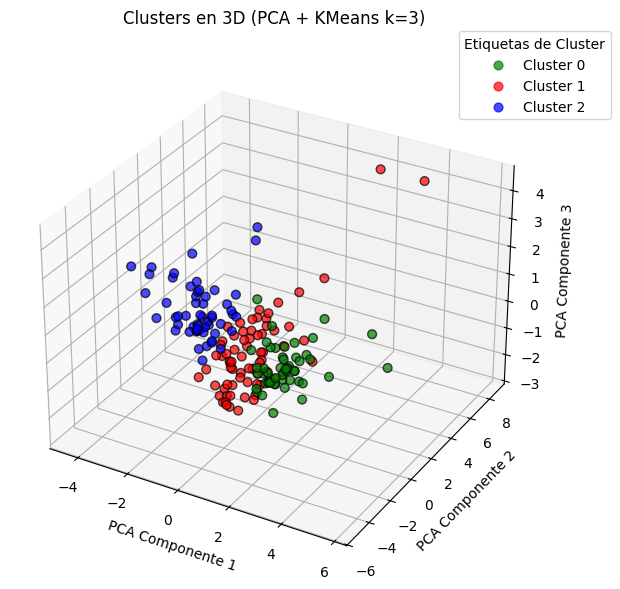

In [66]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(df_muestra)

print("Varianza explicada por componente (3D):", pca3.explained_variance_ratio_)
print("Total varianza en las 3 componentes:", round(pca3.explained_variance_ratio_.sum(), 4) * 100, "%")

k_optimo = 3
km3 = KMeans(n_clusters=k_optimo, random_state=0)
labels3 = km3.fit_predict(X_pca3)

rng = np.random.RandomState(42)

colores_fijos = {
    0: 'green',
    1: 'red',
    2: 'blue'
}

colors3 = [colores_fijos[label] for label in labels3]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    X_pca3[:, 0],
    X_pca3[:, 1],
    X_pca3[:, 2],
    c=colors3,
    s=40,
    alpha=0.7,
    edgecolor='k'
)

ax.set_title(f'Clusters en 3D (PCA + KMeans k={k_optimo})', pad=20)
ax.set_xlabel('PCA Componente 1')
ax.set_ylabel('PCA Componente 2')
ax.set_zlabel('PCA Componente 3')

for cluster_id, nombre_color in colores_fijos.items():
    ax.scatter([], [], [], c=nombre_color, label=f'Cluster {cluster_id}', s=40, alpha=0.7)
ax.legend(title="Etiquetas de Cluster", loc='upper right', bbox_to_anchor=(1.15, 1.05))

plt.tight_layout()
plt.show()

In [67]:
loadings = pd.DataFrame(pca3.components_.T,
                        columns=['PC1', 'PC2', 'PC3'],
                        index=df_muestra.columns)

top_PC1 = loadings['PC1'].abs().sort_values(ascending=False)
top_PC2 = loadings['PC2'].abs().sort_values(ascending=False)
top_PC3 = loadings['PC3'].abs().sort_values(ascending=False)

print("Variables que más influyen en PC1:\n", top_PC1.head())
print("\nVariables que más influyen en PC2:\n", top_PC2.head())
print("\nVariables que más influyen en PC3:\n", top_PC3.head())

Variables que más influyen en PC1:
 Series Name
Manufactures exports (% of merchandise exports)                                  0.445744
Computer; communications and other services (% of commercial service exports)    0.416874
High-technology exports (% of manufactured exports)                              0.367473
ICT service exports (% of service exports; BoP)                                  0.329198
Ores and metals exports (% of merchandise exports)                               0.324571
Name: PC1, dtype: float64

Variables que más influyen en PC2:
 Series Name
Agricultural raw materials exports (% of merchandise exports)                    0.481634
Exports of goods and services (% of GDP)                                         0.423702
Computer; communications and other services (% of commercial service exports)    0.376468
Insurance and financial services (% of service exports; BoP)                     0.298001
ICT service exports (% of service exports; BoP)                    

---


Ahora las variables que más aportan al primer componente son, exportaciones de manufacturas y servicios de comunicación y computación.

El segundo componente, exportaciones de materias primas agrícolas y bienes y servicios.

El tercer componente son exportaciones de combustibles y de comida.


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [68]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}
df_final['Continent'] = df_final['Country Name'].map(country_continent_mapping)
df_final

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Transport services (% of commercial service exports),cluster,Continent
3,Albania,-0.339425,-0.458009,-0.190470,-0.589306,-0.358899,-0.806270,-0.653467,-0.719238,0.577711,0.646142,1.226438,-0.312176,-0.590697,0,Europe
4,Algeria,0.649496,0.856466,-0.668069,-0.579939,-0.175236,0.019835,-0.722862,0.609249,0.084442,0.750056,0.097486,0.055475,0.305515,0,NaN
6,Andorra,-0.338108,-0.895086,0.534126,-1.079300,-0.656745,0.858924,-0.537791,-0.295896,1.962589,0.780358,-0.036391,-0.560329,-1.162248,0,NaN
7,Angola,-0.396216,0.866931,-0.120898,-1.108057,3.770157,1.022358,3.020617,0.610899,-1.428225,-1.176247,-0.446546,-0.382184,0.623925,0,NaN
8,Antigua and Barbuda,-0.396603,-1.160000,-0.024376,2.455661,-0.657222,-0.861021,-0.872063,-0.008501,-0.726955,1.105059,-0.437995,-0.683454,-0.926311,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Uruguay,1.586914,0.434205,-0.544959,1.852598,-0.645522,-0.001858,0.679229,-0.108227,-0.774299,-1.318758,-0.139941,-0.658796,-0.623419,0,South America
256,Uzbekistan,-0.200263,-0.661492,-0.665838,-0.735091,-0.447352,-0.634548,-0.211317,-0.441278,-0.209614,-1.065637,2.673129,-0.101061,1.093967,1,Asia
261,West Bank and Gaza,-0.289147,0.554507,-0.795878,-0.164334,-0.653179,-0.713100,0.150528,-0.451844,0.819829,1.192257,-0.320126,0.318220,-1.183287,0,NaN
264,Zambia,-0.315596,-1.144280,-0.121236,-0.650101,-0.464566,-0.767654,-0.682301,-0.662449,-1.001650,-0.478153,-0.444722,4.269042,-0.845444,0,Africa


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


[0.2125573 0.1674997]
El total de la varianza explicada por PCA:  38.01 %


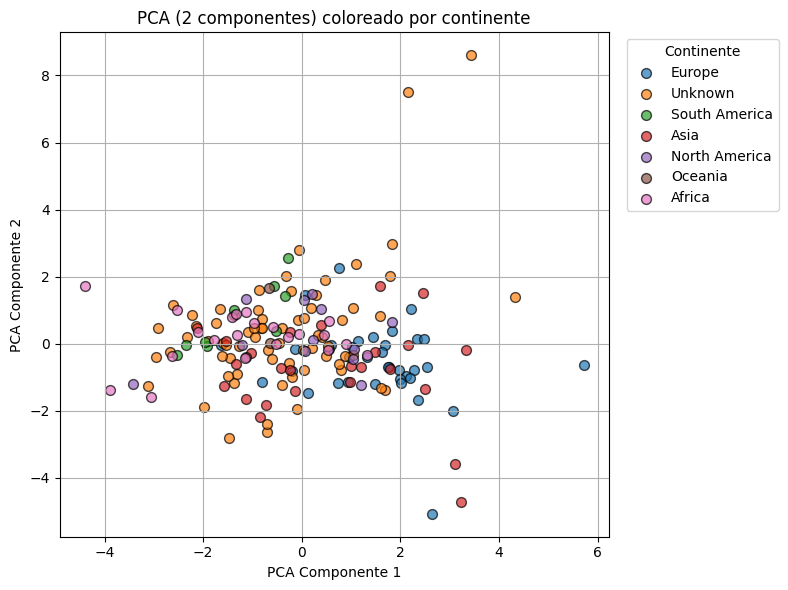

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_muestra)
var_exp = pca.explained_variance_ratio_
print(var_exp)
print('El total de la varianza explicada por PCA: ',round(sum(var_exp),4)*100,'%')

numerical_cols = df_muestra.select_dtypes(include='number').columns.tolist()
X = df_muestra[numerical_cols].values

pca = PCA(n_components=2)
coords = pca.fit_transform(X)


df_pca = pd.DataFrame({
    'PCA1': coords[:, 0],
    'PCA2': coords[:, 1],
    'Country Name': df_final['Country Name'].values
})


df_pca['Continent'] = df_pca['Country Name'].map(country_continent_mapping)

df_pca['Continent'] = df_pca['Continent'].fillna('Unknown')

plt.figure(figsize=(8, 6))

continentes = df_pca['Continent'].unique()
colores = plt.cm.tab10(range(len(continentes)))
color_map = dict(zip(continentes, colores))

for cont in continentes:
    subset = df_pca[df_pca['Continent'] == cont]
    plt.scatter(
        subset['PCA1'],
        subset['PCA2'],
        c=[color_map[cont]],
        label=cont,
        s=50,
        alpha=0.7,
        edgecolor='k'
    )

plt.title("PCA (2 componentes) coloreado por continente")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.legend(title="Continente", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

---


Podemos ver que en verdad no hay una correspondencia de los continentes con los componentes de PCA, es casi como si fueran random.


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



Varianza explicada por cada componente: [0.2125573 0.1674997]
Total varianza explicada (2 comp.): 38.01 %


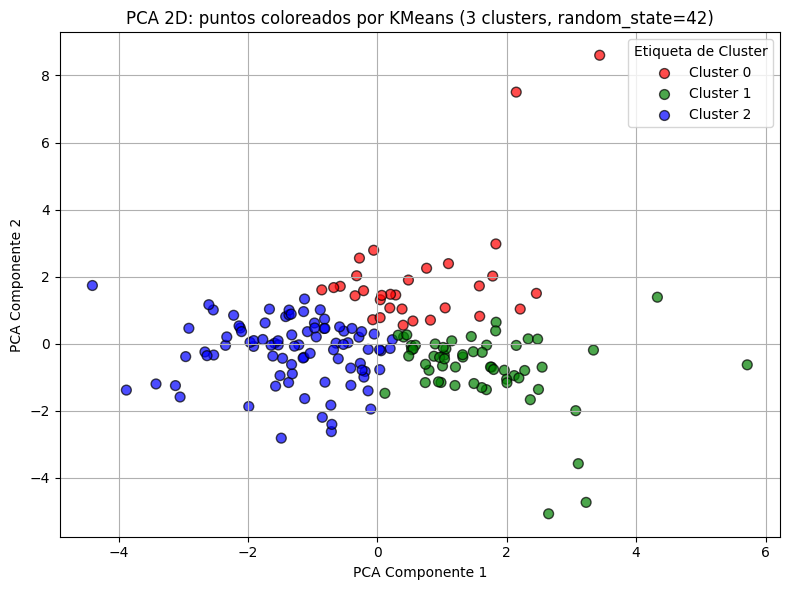

In [70]:
pca = PCA(n_components=2)
coords = pca.fit_transform(df_muestra.values)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Total varianza explicada (2 comp.):", round(pca.explained_variance_ratio_.sum(), 4) * 100, "%")

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(coords)

plt.figure(figsize=(8, 6))

palette = {0: 'red', 1: 'green', 2: 'blue'}
colors = [palette[label] for label in labels]

plt.scatter(
    coords[:, 0],
    coords[:, 1],
    c=colors,
    s=50,
    alpha=0.7,
    edgecolor='k'
)

plt.title("PCA 2D: puntos coloreados por KMeans (3 clusters, random_state=42)")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")

for cluster_id, color in palette.items():
    plt.scatter([], [], c=color, label=f'Cluster {cluster_id}', s=50, alpha=0.7, edgecolor='k')
plt.legend(title="Etiqueta de Cluster", loc='upper right')

plt.grid(True)
plt.tight_layout()
plt.show()

---


Ahora si podemos ver diferencias entre los clusters, principalmente debido al primer componente. Recordemos que el primer componente es un proxy de riqueza, o desarrollo tecnológico, pues recopila variables como exportaciones de manufacturas, servicios de comunicación, computación, tecnología.


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [71]:
df_pca['Cluster'] = labels
ct = pd.crosstab(df_pca['Continent'], df_pca['Cluster'])

prop_por_continente = ct.div(ct.sum(axis=1), axis=0)

prop_por_continente.columns = [f"Cluster {c}" for c in prop_por_continente.columns]

print(prop_por_continente.round(3))

               Cluster 0  Cluster 1  Cluster 2
Continent                                     
Africa             0.045      0.182      0.773
Asia               0.120      0.400      0.480
Europe             0.083      0.806      0.111
North America      0.250      0.333      0.417
Oceania            0.333      0.000      0.667
South America      0.333      0.000      0.667
Unknown            0.243      0.157      0.600


In [72]:
df_pca['Cluster'] = labels
proporciones = pd.crosstab(df_pca['Continent'], df_pca['Cluster'], normalize='index')
print(proporciones.round(2))

Cluster           0     1     2
Continent                      
Africa         0.05  0.18  0.77
Asia           0.12  0.40  0.48
Europe         0.08  0.81  0.11
North America  0.25  0.33  0.42
Oceania        0.33  0.00  0.67
South America  0.33  0.00  0.67
Unknown        0.24  0.16  0.60


In [73]:
proporciones = pd.crosstab(df_pca['Cluster'], df_pca['Continent'], normalize='index')
print(proporciones.round(2))

Continent  Africa  Asia  Europe  North America  Oceania  South America  \
Cluster                                                                  
0            0.03  0.10    0.10           0.10     0.03           0.10   
1            0.07  0.17    0.50           0.07     0.00           0.00   
2            0.19  0.14    0.05           0.06     0.02           0.07   

Continent  Unknown  
Cluster             
0             0.55  
1             0.19  
2             0.48  


Podemos ver que el cluster 0 está compuesto por países con continente unknown, generalmente países más chicos. El cluster 1 contiene una parte muy importante de europa, seguramente ese cluster es el que agrupa a los países más desarrollados y enfocados en la industria tecnológica. Luego el tercer cluster probablemente agrupe a países de menores ingresos enfocados en exportaciones de materias primas, pues tiene un alto porcentaje de áfcrica y de sudamérica.

### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


---


*Escriba* su respuesta en esta celda...


---